# Example to illustrate how to use WQChartPy

## Introduction

WQChartPy is an an open-source Python package for producing most of the graphical diagrams for visualization of water geochemistry data. Utilizing the commonly used comma-separated values (CSV) file as the input data format, WQChartPy can produce twelve geochemical diagrams including not only the traditional Piper trilinear, Durov, Chadha, Stiff, Chernoff face, Schoeller, Gibbs, and Gaillardet diagram, but also the recently proposed diagrams such as the rectangle Piper, color-coded Piper, contoured Piper, and HFE-D diagrams that have not been implemented in previous software.

This is the first release of WQChartPy. As a Python-based cross platform program, WQChartPy works on Windows, MacOS X and GNU/Linux. This Jupyter Notebook file illustrates how to use WQChartPy by using the example data. Users with a little Python experience can do the whole process from data to the graphical diagrams. Buidling on the oldest and most popular Python plotting library Matplotlib, the figures generated by WQChartPy can be saved as portable network graphics (PNG), scalable vector graphics (SVG) or portable document format (PDF). WQChartPy is an open-source project and any assistance is welcomed. Please email the development team if you want to contribute.

## Installation

WQChartPy requires Python 3.7 (or higher). We recommend using Anaconda on Windows or Linux platforms.The easiest way to install is via pip:

pip install wqchartpy

Another way is to manually install WQChartPy with setup.py. Preliminary steps to take:

1. Download the package and extract it into a local directory

2. cd into the root directory where setup.py is located using an Anaconda Prompt

3. Enter: python setup.py install

## Load data

WQChartPy utilizes Python package Pandas to load water geochemistry data from local disk or online. Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It works with various data formats including Microsoft Excel file, comma-separated values (CSV) file and Text file. We prepared the template data in different data formats in the "data" folder to give a short introduction on working with various geochemistry data format. However, we recommend organizing the water geochemistry data into a csv file.

### Import Pandas package

In [1]:
import pandas as pd

### Load data from local CSV file

In this example, we work with the template data in CSV format. The file name is "data_template.csv" and it is located in the "data" folder.We can read data from a CSV file using read_csv() in Pandas. 


In [2]:
# Load the template data
df = pd.read_csv('../data/data_template.csv')

# Show the data
df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,sample1,C1,red,o,30,0.6,7.8,32,6,28,2.8,73,0,43,48,233
1,sample2,C2,green,o,30,0.6,7.6,46,11,17,0.7,201,0,14,9,299
2,sample3,C2,green,o,30,0.6,7.5,54,11,16,2.4,207,0,18,10,377
3,sample4,C3,blue,o,30,0.6,7.7,50,11,25,2.8,244,0,18,9,360
4,sample5,C3,blue,o,30,0.6,7.4,50,22,25,0.5,305,0,11,9,424
5,sample6,C1,red,o,30,0.6,7.1,134,21,39,6.4,275,0,96,100,673


The example data set contains six water samples named sample1, sample2, ..., and sample6. The concentration values of Ca, Mg, Na, K, Cl, CO3, HCO3, and SO4 are taken from Ray and Mukherjee (2008). The pH and TDS values are randomly generated.

1.	The first column named Sample stores the sample names or IDs. 

2.	The second column named Label indicates which group a sample belongs to. For example, the C1, C2, and C3 indicate the samples are from four clusters. This column is very important as it is used to distinguish samples from different groups in the plots.

3.	The third column named Color is used to store the colors shown for the samples. A complete list of colors can be found here https://matplotlib.org/stable/gallery/color/named_colors.html.
	
4.	The fourth column named Marker is used to store the marker styles shown for the samples. A complete list of markers can be found here https://matplotlib.org/stable/api/markers_api.html.
	
5.	The fifth column named Size is used to control the values of marker size shown for the samples. 
	
6.	The sixth column named Alpha is used to change the opacity of the markers. The alpha value should be between 0 (transparent) and 1 (opaque).

7.	The remaining columns store the concentration values of the geochemical parameters. All the concentrations should be in mg/L except for pH in its standard unit.

Note that the column names cannot be changed. However, the order of these parameter columns is flexible. 

Below we will show how to load geochemistry data in Microsoft Excel file, Text file and online file using Pandas.

### Load data from local Microsoft Excel file

In this example, we work with the template data in Excel format. The file name is "data_template.xlsx" and it is located in the "data" folder. Note the worksheet name is "data_template" in the Excel file.We can read data from a Excel file using read_excel () in Pandas. 


In [3]:
# Load the template data
df = pd.read_excel('../data/data_template.xlsx', sheet_name='data_template')  

# Show the data
df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,sample1,C1,red,o,30,0.6,7.8,32,6,28,2.8,73,0,43,48,233
1,sample2,C2,green,o,30,0.6,7.6,46,11,17,0.7,201,0,14,9,299
2,sample3,C2,green,o,30,0.6,7.5,54,11,16,2.4,207,0,18,10,377
3,sample4,C3,blue,o,30,0.6,7.7,50,11,25,2.8,244,0,18,9,360
4,sample5,C3,blue,o,30,0.6,7.4,50,22,25,0.5,305,0,11,9,424
5,sample6,C1,red,o,30,0.6,7.1,134,21,39,6.4,275,0,96,100,673


### Load data from local Text file

In this example, we work with the template data in Text format. The file name is "data_template.txt" and it is located in the "data" folder. We can read data from a text file using read_table () in Pandas. This function reads a general delimited file to a DataFrame object. This function is essentially the same as the read_csv () function but with the tab delimiter, instead of a comma by default.Other delimiters such as space are also allowed as long as the file is well organized.

In [4]:
# Load the template data
df = pd.read_table('../data/data_template.txt', sep='\t')  

# Show the data
df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,sample1,C1,red,o,30,0.6,7.8,32,6,28,2.8,73,0,43,48,233
1,sample2,C2,green,o,30,0.6,7.6,46,11,17,0.7,201,0,14,9,299
2,sample3,C2,green,o,30,0.6,7.5,54,11,16,2.4,207,0,18,10,377
3,sample4,C3,blue,o,30,0.6,7.7,50,11,25,2.8,244,0,18,9,360
4,sample5,C3,blue,o,30,0.6,7.4,50,22,25,0.5,305,0,11,9,424
5,sample6,C1,red,o,30,0.6,7.1,134,21,39,6.4,275,0,96,100,673


### Load online data 

In this example, we work with the online data . We have stored the example dataset on our github. We can read data by using pd.read_csv() from URL.

In [5]:
# Load the template data
#url = 'https://raw.githubusercontent.com/jyangfsu/WQChartPy/main/data/data_template.csv'
#df = pd.read_csv(url)

# Show the data
#df

## Plot the diagrams

After reading the data from the CSV file (or other data format) into the Pandas DataFrame, WQChartPy can be executed in two lines of Python codes to generate a diagram, so that a user with limited experience of Python programming can use WQChartPy. 

### Gibbs plot


Bad key text.latex.preview in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0b1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0b1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You p

Gibbs plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



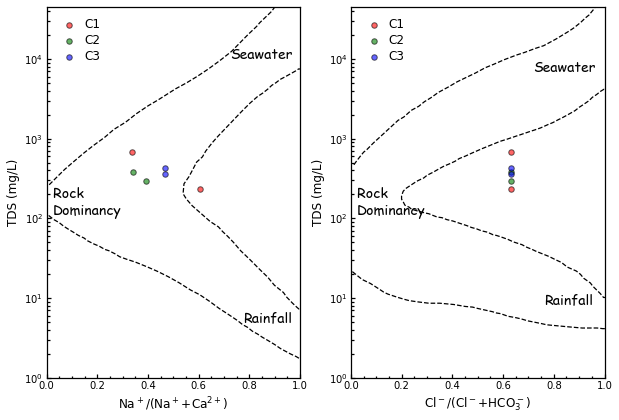

In [6]:
from wqchartpy import gibbs

gibbs.plot(df, unit='mg/L', figname='Gibbs diagram', figformat='jpg')

There are four argeuments for the gibbs.plot() function. The “df” argument is the DataFrame read by Pandas. The “unit” argument indicates the units of groundwater geochemistry data. Although the current WQChartPy are only compatible with the unit of mg/L, the codes may be expanded later to be compatible with other units. The mg/L is selected because it is the most widely reported unit. When plotting diagrams which require to be plotted in meq/L or in milliequivalent ratios, such as triangle Piper, rectangle Piper, color-coded Piper, Stiff, and Schoeller diagrams, the WQChartPy would automatically transfer the mg/L to meq/L first within the corresponding plotting functions. The “figname” and “figformat” arguments specify the name and format of the file that saves the generated diagram to a local disk (e.g., the same folder that contains this script). The file format can be portable network graphics (PNG), scalable vector graphics (SVG), or portable document format (PDF). 

The four argeuments are commonly used in wqchartpy, as shown below.

### Piper diagram - triangle

Trilinear Piper plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



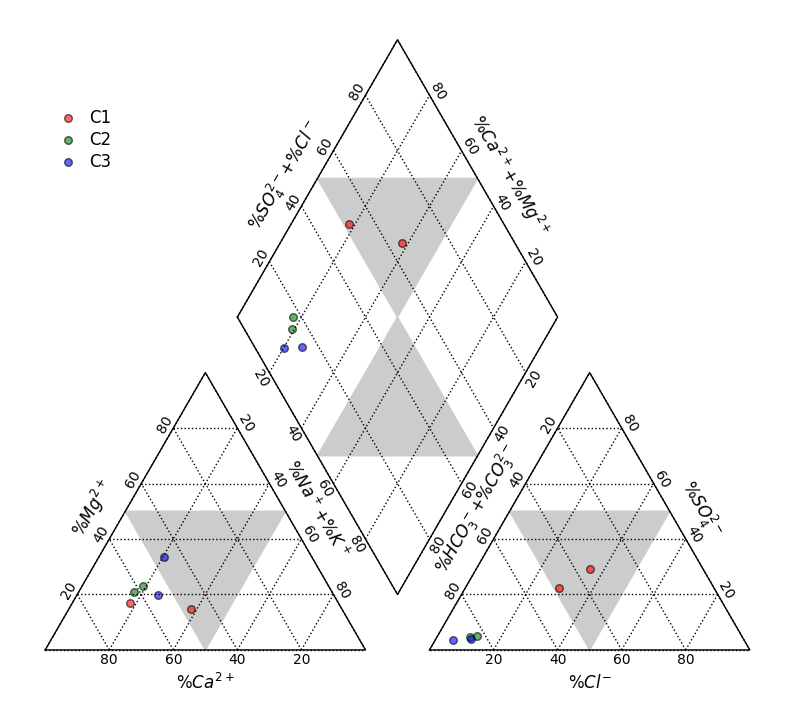

In [7]:
from wqchartpy import triangle_piper

triangle_piper.plot(df, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')

### Piper diagram - rectangle

Rectangle Piper plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



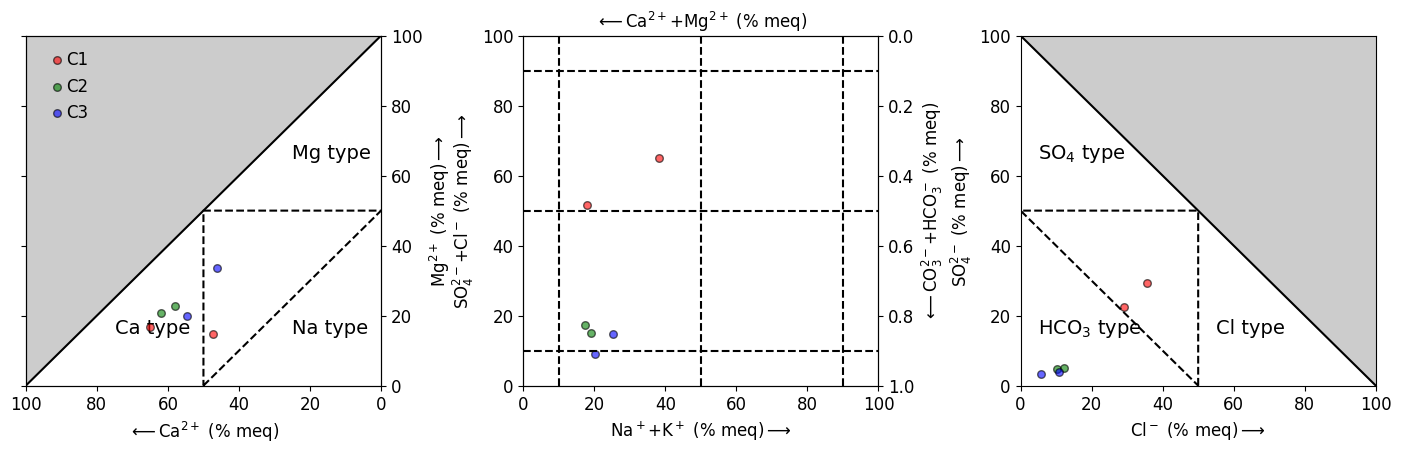

In [8]:
from wqchartpy import rectangle_piper

rectangle_piper.plot(df, unit='mg/L', figname='rectangle Piper diagram', figformat='jpg')

### Piper diagram - color-coded

Color-coded Piper plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



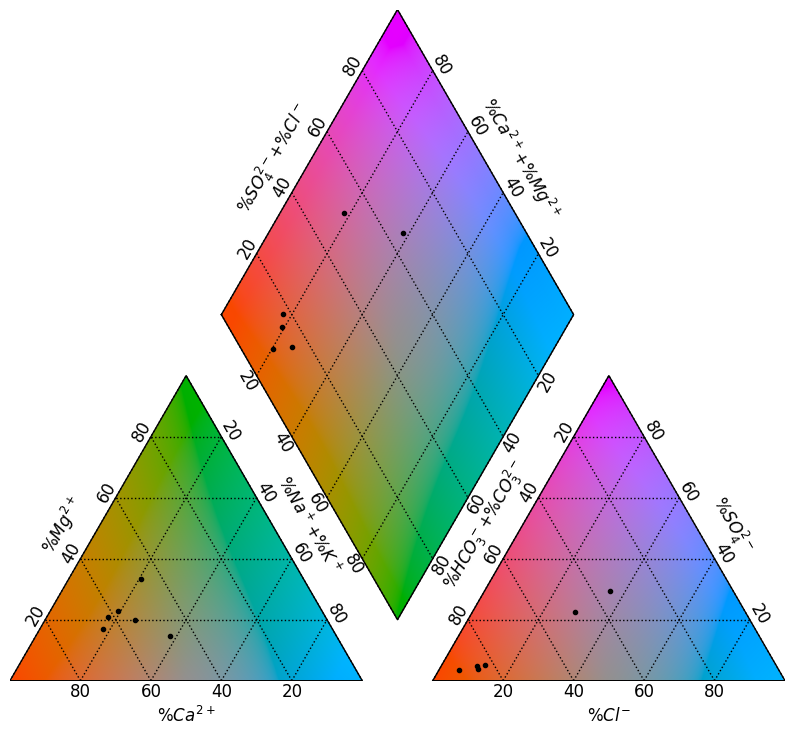

In [9]:
from wqchartpy import color_piper

rgb = color_piper.plot(df, unit='mg/L', figname='color-coded Piper diagram', figformat='jpg')

One may note that except for the genereated figure, color_piper.plot() function also returns the RGB values in the two trangles and the central diamond. The RGB values are then subsequently used for spatial representations of the water samples. Interested readers are referred to Peeters (2014).

Peeters, L. 2014. A background color scheme for piper plots to spatially visualize hydrochemical patterns. Ground Water 52 no. 1: 2-6. https://doi.org/10.1111/gwat.12118

### Piper diagram - contour-filled

Contour-filed Piper plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



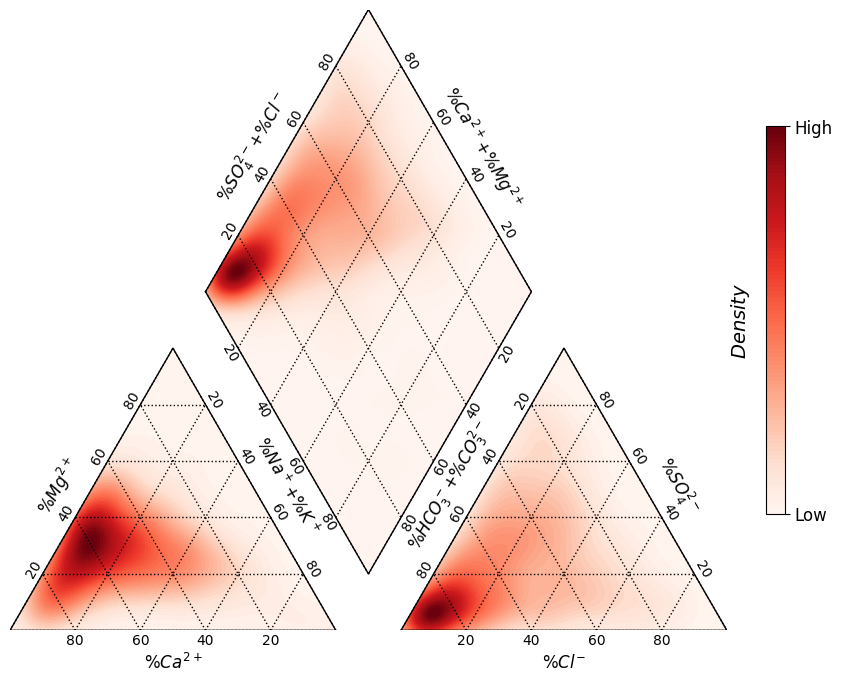

In [10]:
from wqchartpy import contour_piper

# Because the contour-filled Piper is created for display large datasets. We below used the example dataset taken from Figure 2b of Moreno_Merino et al.(2021)
df_large = pd.read_csv('../data/data_Moreno_Merino _et_al_2021.csv')

contour_piper.plot(df_large, unit='mg/L', figname='contour-filled Piper diagram', figformat='jpg')

### Durvo diagram

Durvo diagram created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



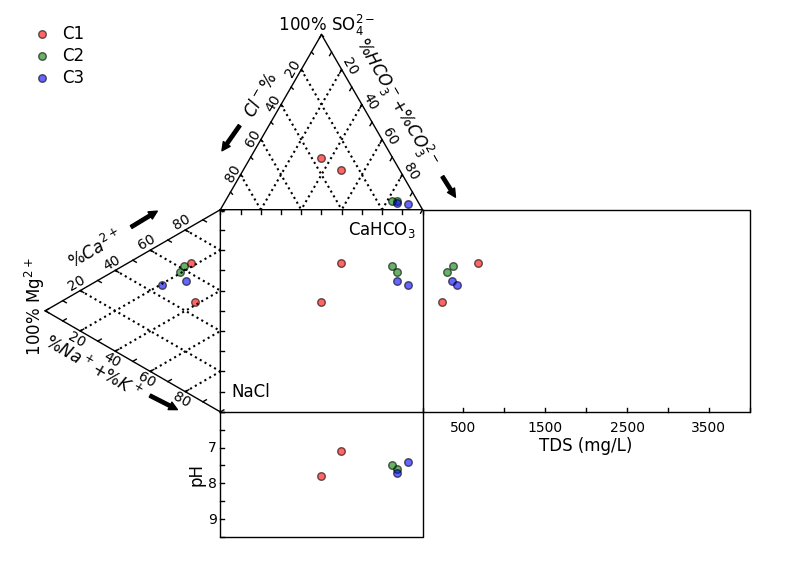

In [11]:
from wqchartpy import durvo

durvo.plot(df, unit='mg/L', figname='Durvo diagram', figformat='jpg')

### HFE-D diagram

HFE-D plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



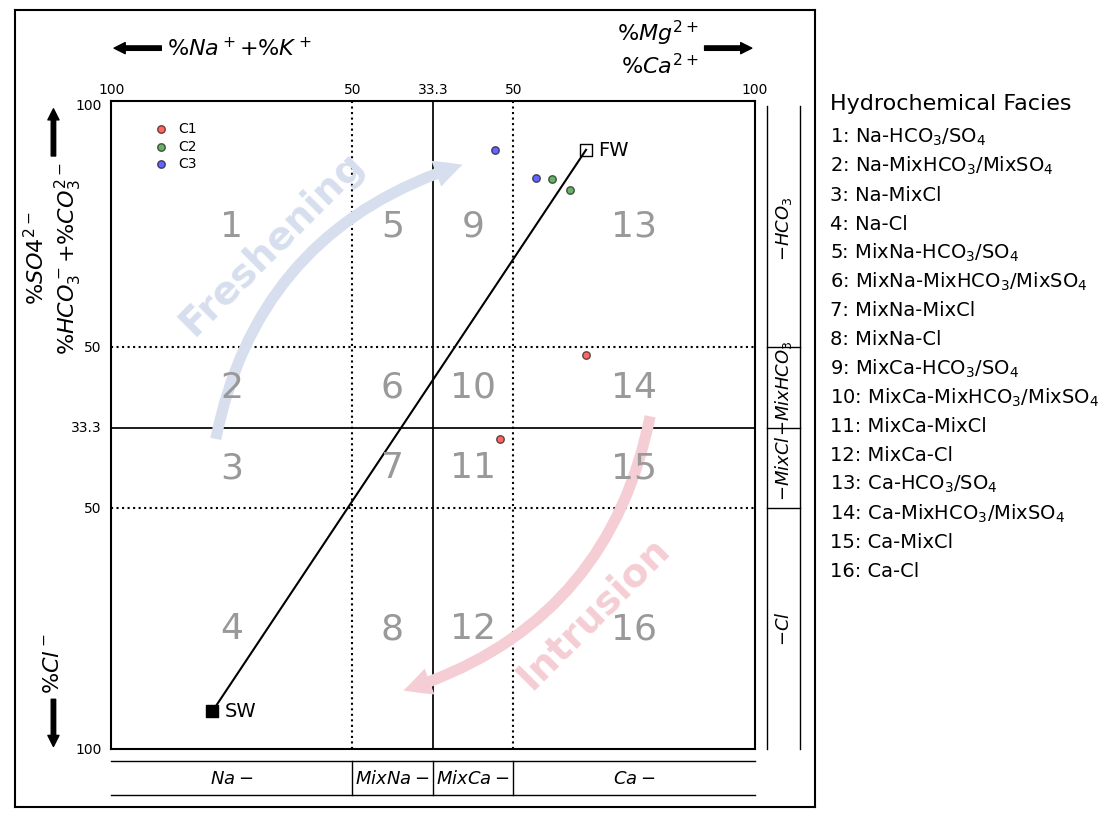

In [12]:
from wqchartpy import hfed

hfed.plot(df, unit='mg/L', figname='HFE-D diagram', figformat='jpg')

### Stiff diagram

Stiff plot created for sample1. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Stiff plot created for sample2. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Stiff plot created for sample3. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Stiff plot created for sample4. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Stiff plot created for sample5. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Stiff plot created for sample6. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples



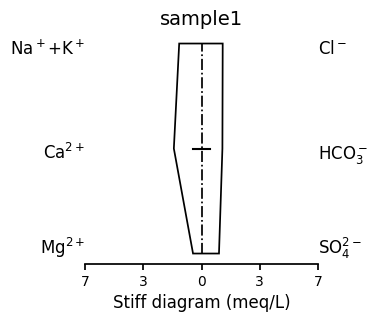

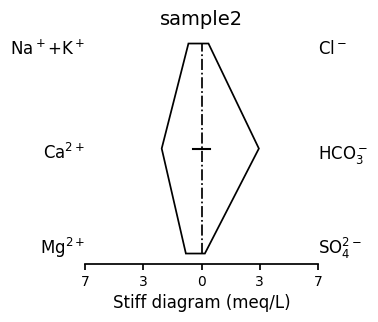

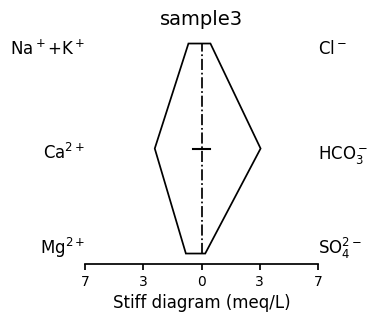

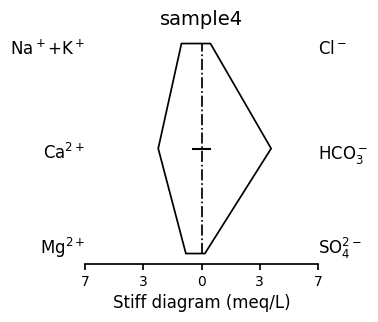

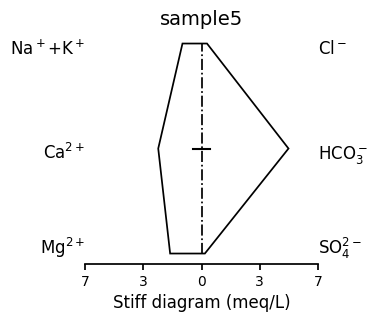

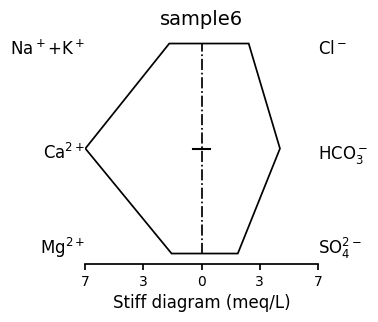

In [13]:
from wqchartpy import stiff

stiff.plot(df, unit='mg/L', figname='Stiff diagram', figformat='jpg')

The stiff.plot() function generates the stiff diagram for each water sample.

### Chadha diagram

Chadha plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



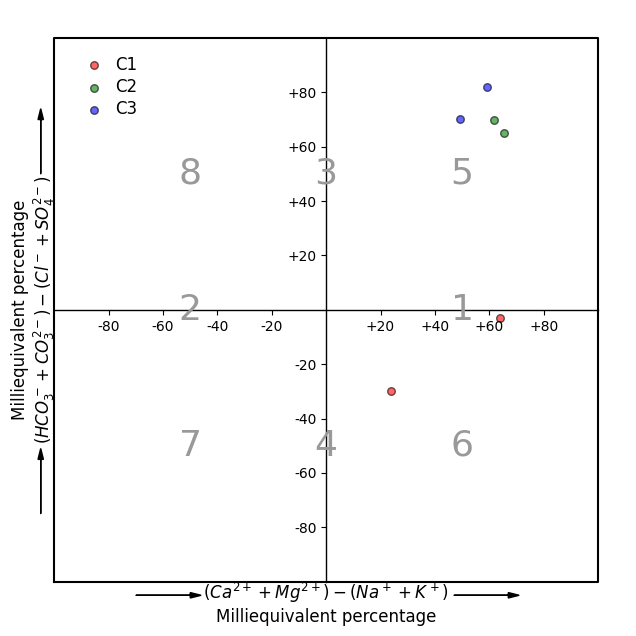

In [14]:
from wqchartpy import chadha

chadha.plot(df, unit='mg/L', figname='Chadha diagram', figformat='jpg')

### Gaillardet diagram

Gaillardet plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



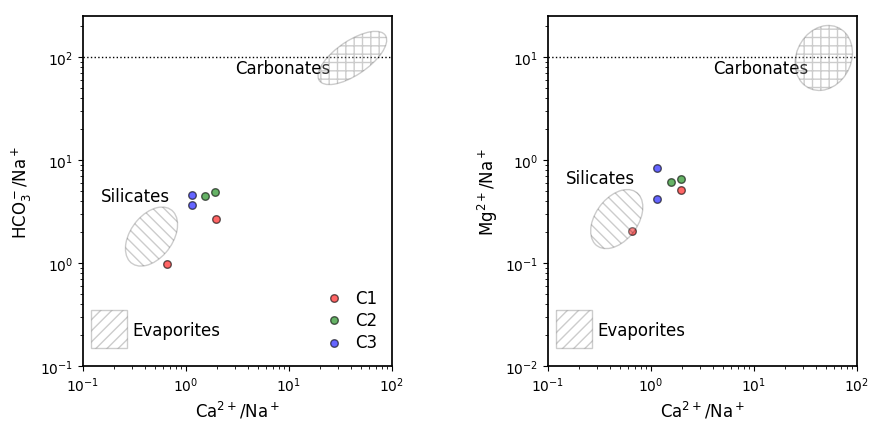

In [15]:
from wqchartpy import gaillardet

gaillardet.plot(df, unit='mg/L', figname='Gaillardet diagram', figformat='jpg')

### Schoeller diagram

Schoeller diagram created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



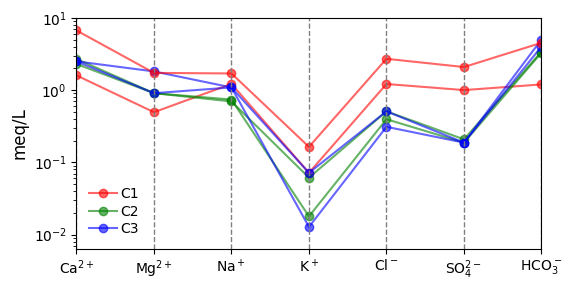

In [16]:
from wqchartpy import schoeller

schoeller.plot(df, unit='mg/L', figname='Schoeller diagram', figformat='jpg')

### Chernoff face

Chernoff face created for sample1. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Chernoff face created for sample2. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Chernoff face created for sample3. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Chernoff face created for sample4. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Chernoff face created for sample5. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples

Chernoff face created for sample6. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples



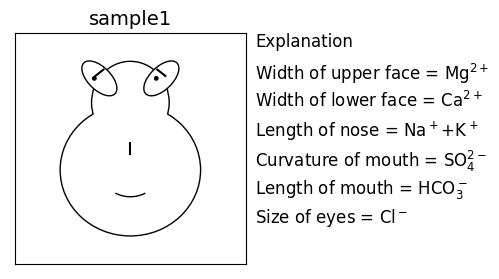

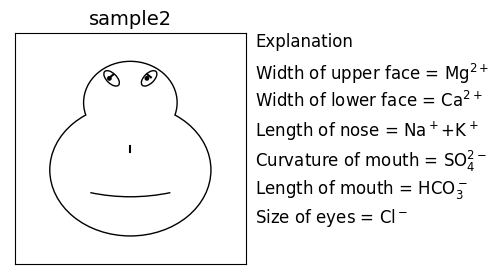

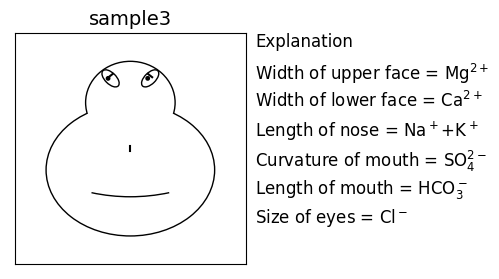

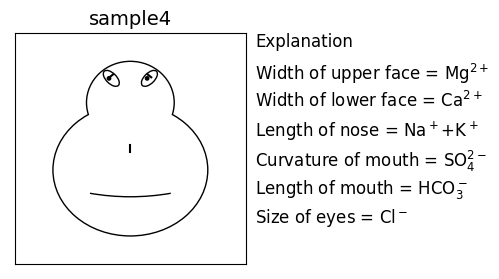

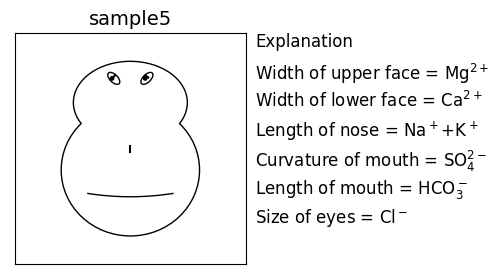

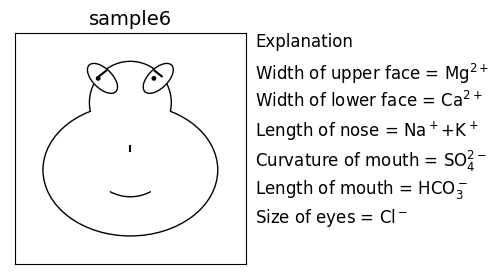

In [17]:
from wqchartpy import chernoff

chernoff.plot(df, unit='mg/L', figname='Chernoff face diagram', figformat='jpg')

Similar to the stiff.plot(), the chernoff.plot() function also generates the Chernoff face for each water sample.

## PostProcessing

### Change the marker, color, size, and alpha values for  individual groups

There are two ways to change the marker, color, size, and alpha values for individual groups. The first way is to define their values directly in the input file before loading the data. This can be achieved by simply defining the values of three columns named “Marker”, “Size”,“Color”, and "Alpha"for each group.

The second way is to re-defined the “Marker”, “Size”,“Color”, and "Alpha" values by using functions provided by Pandas package after loading the data. We will show below by using the Triangle Piper as an example.

In [18]:
# Show the orignal data
df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,sample1,C1,red,o,30,0.6,7.8,32,6,28,2.8,73,0,43,48,233
1,sample2,C2,green,o,30,0.6,7.6,46,11,17,0.7,201,0,14,9,299
2,sample3,C2,green,o,30,0.6,7.5,54,11,16,2.4,207,0,18,10,377
3,sample4,C3,blue,o,30,0.6,7.7,50,11,25,2.8,244,0,18,9,360
4,sample5,C3,blue,o,30,0.6,7.4,50,22,25,0.5,305,0,11,9,424
5,sample6,C1,red,o,30,0.6,7.1,134,21,39,6.4,275,0,96,100,673


In [19]:
# Change the Color of C1 to yellow
df.loc[df['Label']=='C1', 'Color'] = 'yellow'

# Change the Marker of C2 to square
df.loc[df['Label']=='C2', 'Marker'] = 's'

# Change the Size of C3 to 20
df.loc[df['Label']=='C3', 'Size'] = 20

# Change the Alpha values of C3 to 1.0
df.loc[df['Label']=='C3', 'Alpha'] = 1.0

# Show the new df
df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,sample1,C1,yellow,o,30,0.6,7.8,32,6,28,2.8,73,0,43,48,233
1,sample2,C2,green,s,30,0.6,7.6,46,11,17,0.7,201,0,14,9,299
2,sample3,C2,green,s,30,0.6,7.5,54,11,16,2.4,207,0,18,10,377
3,sample4,C3,blue,o,20,1.0,7.7,50,11,25,2.8,244,0,18,9,360
4,sample5,C3,blue,o,20,1.0,7.4,50,22,25,0.5,305,0,11,9,424
5,sample6,C1,yellow,o,30,0.6,7.1,134,21,39,6.4,275,0,96,100,673


Trilinear Piper plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



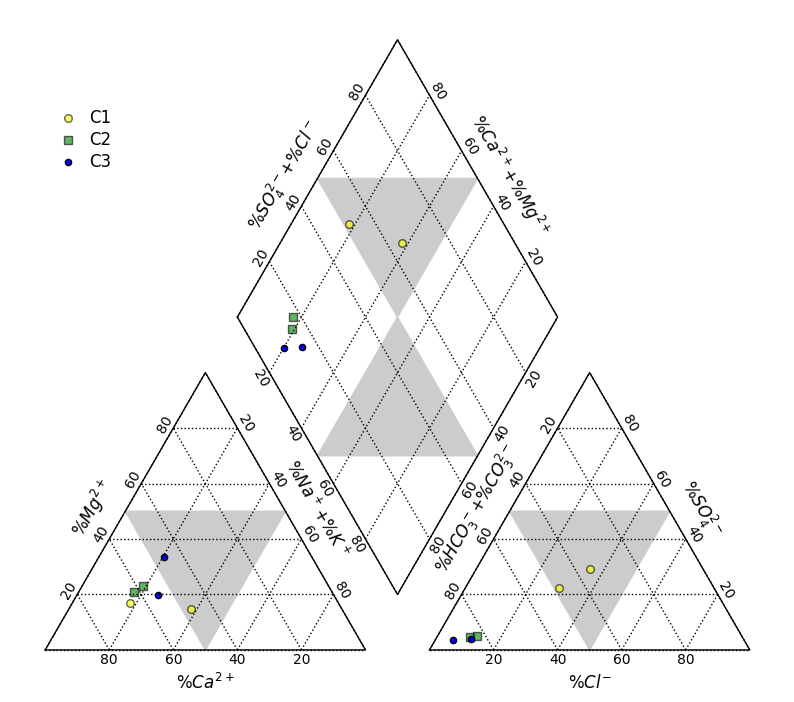

In [20]:
# Draw the Triangle Piper
from wqchartpy import triangle_piper

triangle_piper.plot(df, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')

### Enable the size and color to vary across the range of other parmaters

There are two ways to change the color and size to vary across the range of other parmaters. The first way is to define their values directly in the input file before loading the data. This can be achieved by simply defining the values in the input data file. For example, a conversion factor may be used to convert TDS values to the marker size values. As for the color, a conversion factor also works. That is, users are allowed to set float values under the “Color” column.

The size and color can be set to vary by one of the other columns after loading the data. This can be achieved by simply re-defined the  “Size”  and “Color” values by using functions provided by Pandas package. We will show below by using the Triangle Piper as an example.

In [21]:
# Show the df
df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,sample1,C1,yellow,o,30,0.6,7.8,32,6,28,2.8,73,0,43,48,233
1,sample2,C2,green,s,30,0.6,7.6,46,11,17,0.7,201,0,14,9,299
2,sample3,C2,green,s,30,0.6,7.5,54,11,16,2.4,207,0,18,10,377
3,sample4,C3,blue,o,20,1.0,7.7,50,11,25,2.8,244,0,18,9,360
4,sample5,C3,blue,o,20,1.0,7.4,50,22,25,0.5,305,0,11,9,424
5,sample6,C1,yellow,o,30,0.6,7.1,134,21,39,6.4,275,0,96,100,673


In [22]:
# Change the size of marker to vary accros the TDS values
df.loc[:, 'Size'] = 0.1 *  df.loc[:, 'TDS']

# Show df
df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,sample1,C1,yellow,o,23.3,0.6,7.8,32,6,28,2.8,73,0,43,48,233
1,sample2,C2,green,s,29.9,0.6,7.6,46,11,17,0.7,201,0,14,9,299
2,sample3,C2,green,s,37.7,0.6,7.5,54,11,16,2.4,207,0,18,10,377
3,sample4,C3,blue,o,36.0,1.0,7.7,50,11,25,2.8,244,0,18,9,360
4,sample5,C3,blue,o,42.4,1.0,7.4,50,22,25,0.5,305,0,11,9,424
5,sample6,C1,yellow,o,67.3,0.6,7.1,134,21,39,6.4,275,0,96,100,673


In [23]:
# Change the color of marker to vary accros the TDS values
df.loc[:, 'Color'] = 1 * df.loc[:, 'TDS']

# Show df
df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,sample1,C1,233,o,23.3,0.6,7.8,32,6,28,2.8,73,0,43,48,233
1,sample2,C2,299,s,29.9,0.6,7.6,46,11,17,0.7,201,0,14,9,299
2,sample3,C2,377,s,37.7,0.6,7.5,54,11,16,2.4,207,0,18,10,377
3,sample4,C3,360,o,36.0,1.0,7.7,50,11,25,2.8,244,0,18,9,360
4,sample5,C3,424,o,42.4,1.0,7.4,50,22,25,0.5,305,0,11,9,424
5,sample6,C1,673,o,67.3,0.6,7.1,134,21,39,6.4,275,0,96,100,673


Trilinear Piper plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



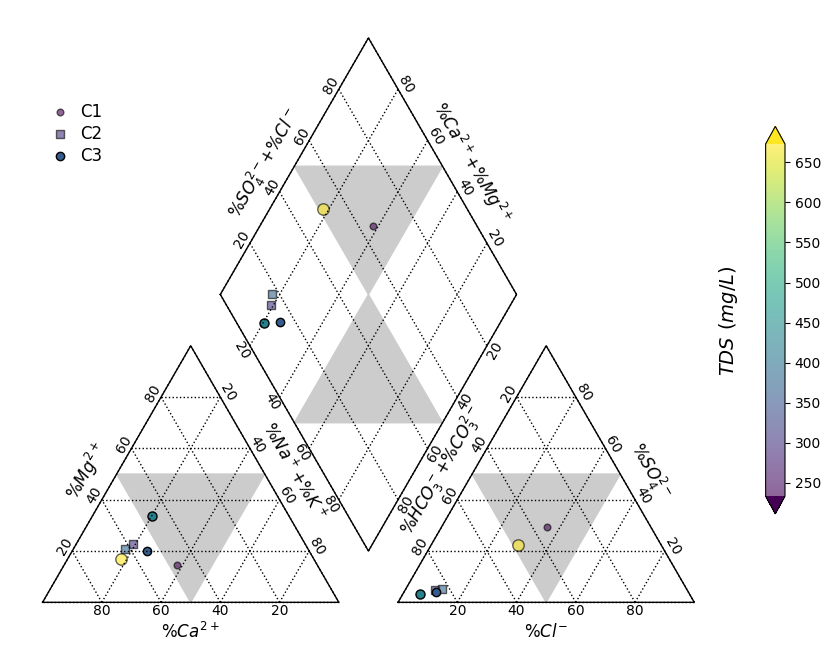

In [24]:
# Draw the Triangle Piper
from wqchartpy import triangle_piper

triangle_piper.plot(df, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')

HFE-D plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



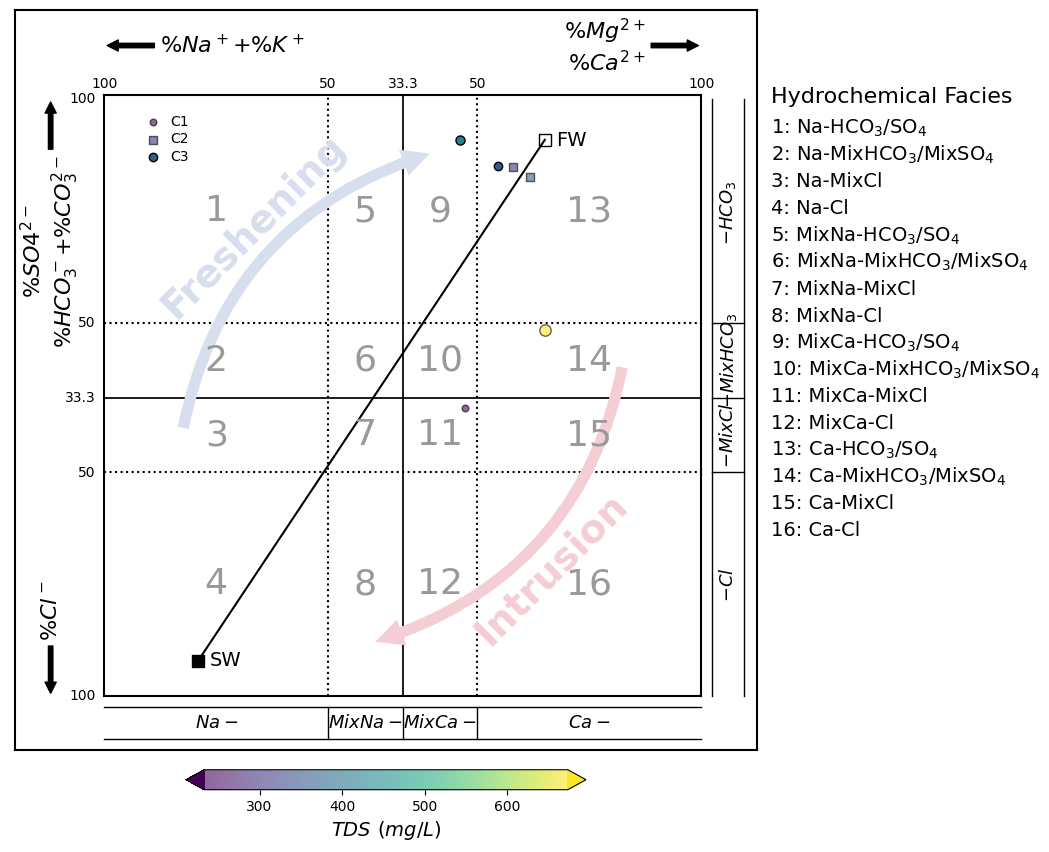

In [25]:
# Draw the Triangle Piper
from wqchartpy import hfed

hfed.plot(df, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')